File: cell107basal.abf | sweeps: 15 | total length: 322.50 s


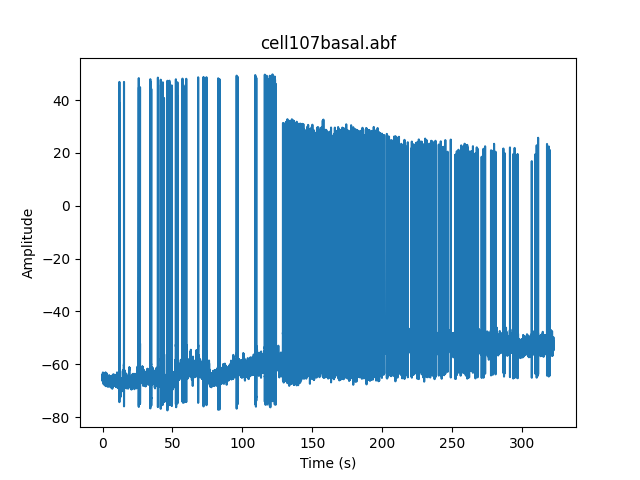

File: cell209basal.abf | sweeps: 6 | total length: 129.00 s


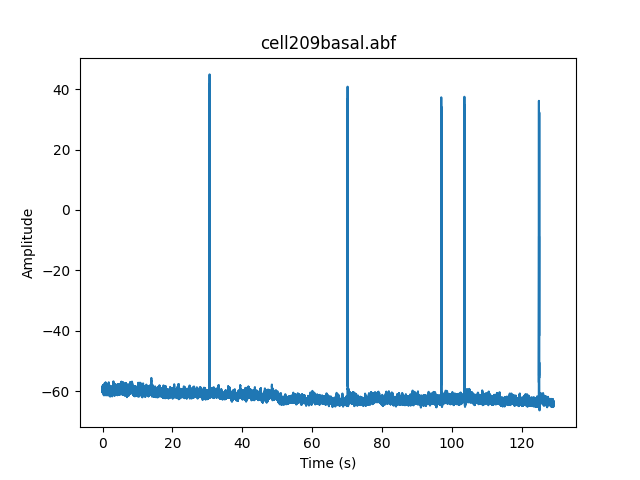

File: cell91basal.abf | sweeps: 9 | total length: 193.50 s


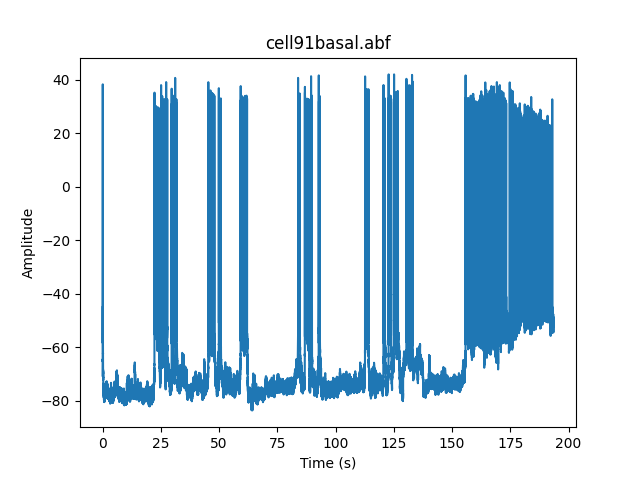

File: cell21basal.abf | sweeps: 9 | total length: 193.50 s


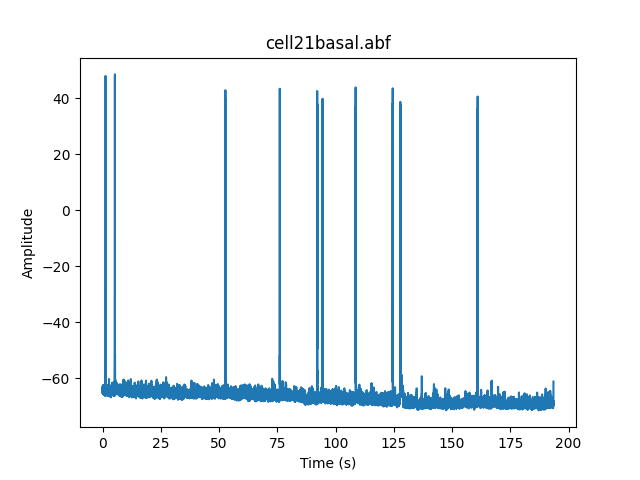

File: cell89basal.abf | sweeps: 30 | total length: 645.00 s


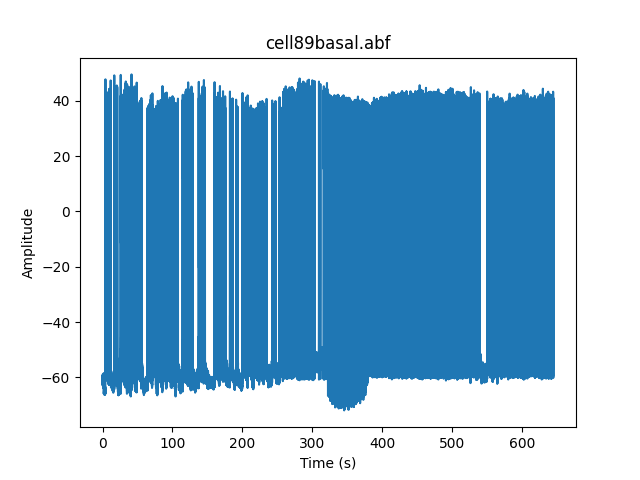

File: cell105basal.abf | sweeps: 9 | total length: 193.50 s


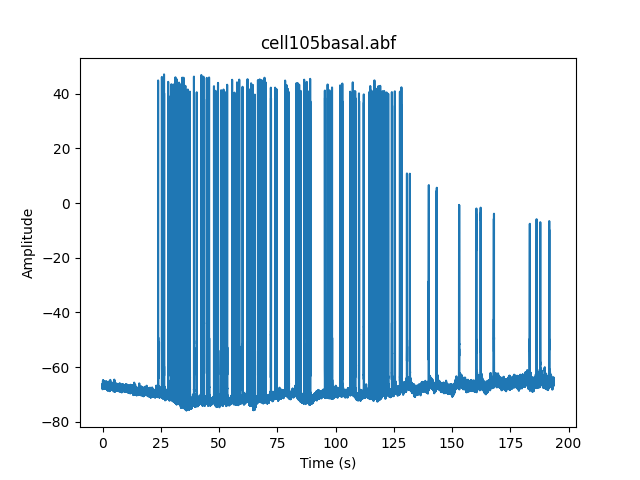

File: cell104basal.abf | sweeps: 12 | total length: 258.00 s


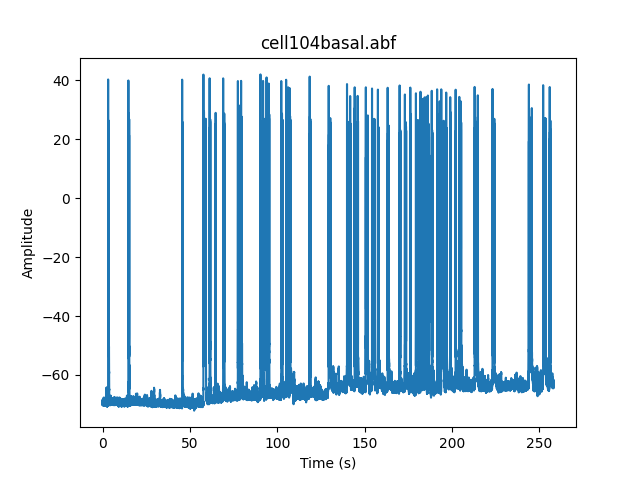

File: cell98basal.abf | sweeps: 21 | total length: 451.50 s


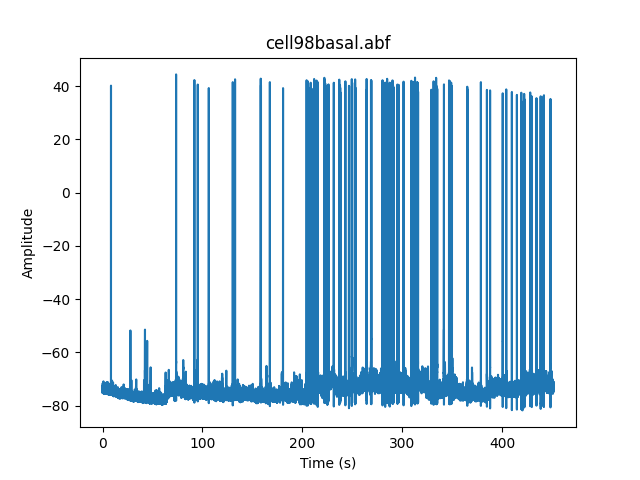

In [1]:
#Simple representation of the time series by putting together all the sweeps

#Load the libraries
import pyabf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import glob #glob helps to detect and find documents. In this case it is wanted to obtain all the .abfs in the folder bursting
import os #os helps to complete the name of the path file. It also servers to get the name of documents and their directory


all_signals =[] #This 2 lists will not be used for this exact graphicalrepresentation of the .abf time series, but as it stores the data 
all_times = []  #that mya be used for later

#Name the folder in which the abfs are located
folder = "bursting"

abf_files = glob.glob(os.path.join(folder, "*.abf")) #With this line, it sorts the .abfs by their alphabetic order 
abf_files.sort(key=os.path.getmtime) #It sorts the .abfs depending on the time that were documented 

for file in abf_files:
    abf = pyabf.ABF(file)

    signal = np.concatenate([abf.setSweep(i) or abf.sweepY for i in range(abf.sweepCount)])

    dt = 1.0 / abf.dataRate
    time = np.arange(len(signal)) *dt

    all_signals.append(signal) #Store data for possible later use
    all_times.append(time) #Store data for possible later use

    print(f"File: {os.path.basename(file)} | sweeps: {abf.sweepCount} | total length: {time[-1]:.2f} s") 

    plt.figure()
    plt.plot(time, signal)
    plt.title(os.path.basename(file))
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [ ]:
# Normalization of the time series:

import pyabf
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

def load_and_normalize_abf(file, mode = "sweeps", method = "zscore"):
    abf = pyabf.ABF(file)

    if mode == "sweeps":
        signal = np.concatenate([abf.setSweep(i) or abf.sweepY for i in range(abf.sweepCount)])
    elif mode == "raw":
        signal = abf.data
    else: 
        raise ValueError("Modo inválido: 'sweeps' o 'raw'")

'bursting\\cell98basal.abf'